<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#DeiT" data-toc-modified-id="DeiT-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DeiT</a></span><ul class="toc-item"><li><span><a href="#30/70-without-weight-init" data-toc-modified-id="30/70-without-weight-init-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>30/70 without weight init</a></span></li><li><span><a href="#30/70-split" data-toc-modified-id="30/70-split-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>30/70 split</a></span></li></ul></li><li><span><a href="#Full-train" data-toc-modified-id="Full-train-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Full train</a></span></li><li><span><a href="#DeiT" data-toc-modified-id="DeiT-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DeiT</a></span><ul class="toc-item"><li><span><a href="#30/70-without-weight-init" data-toc-modified-id="30/70-without-weight-init-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>30/70 without weight init</a></span></li><li><span><a href="#30/70-split" data-toc-modified-id="30/70-split-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>30/70 split</a></span></li></ul></li><li><span><a href="#Full-train" data-toc-modified-id="Full-train-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Full train</a></span></li></ul></div>

## DeiT

### 30/70 without weight init

### 30/70 split

In [2]:
from imports import *
from utils import load_data
from image_train.data import create_dl, ImageDS
from image_train.model import EMBRes
from arcface import ArcMarginProduct, compute_centers
from image_train.train import *
import matplotlib.pyplot as plt
np.random.seed(1337)
device = torch.device('cuda')

In [3]:
df, train_df, val_df, train_labels, val_labels = load_data(train_perc=0.3)

In [4]:
# creating dataloaders
small_images_dir_train = 'data/small_train_images_540/'
small_images_dir_val = 'data/small_train_images_512/'
bs = 8

tr_dl = create_dl(train_df, small_images_dir_train, batch_size=bs)
tr_test_dl = create_dl(train_df, small_images_dir_val, shuffle=False, batch_size=bs)
val_dl = create_dl(val_df, small_images_dir_val, shuffle=False, batch_size=bs)
#full_dl = create_dl(df, small_images_dir, shuffle=False)

In [5]:
vision_model = 'efficientnet_b3a'
model = timm.create_model(vision_model, pretrained=True, num_classes=0).to('cuda')
train_tfms, val_tfms = get_tfms(crop=512)

centers = compute_centers(tr_test_dl, model, val_tfms, train_df)
torch.save(centers, 'data/image_models/deit_clean_data/centers_0.3.pth')

In [5]:
centers = torch.load('data/image_models/deit/centers_0.3.pth')

In [6]:
metric_fc = ArcMarginProduct(1536, train_df['label_group'].nunique(), 
                             s=30, m=0.5, easy_margin=False, centers=centers).to(device)

Using center as wieghts


In [7]:
n_epochs, lf, params, optimizer, sched = get_hparams(tr_dl, model, metric_fc, lr=5e-4, n_epochs=15)

In [8]:
loss_hist = []
best_thr_score={'val': {'thr': None, 'f1': None}, 'train': {'thr': None, 'f1': None}}
thr_score_hist=[]
ep_start = 0
save_path = 'data/image_models/deit/test_5ap'

In [9]:
best_thr_score, thr_score_hist, losses = train(model, optimizer, lf, sched, metric_fc, tr_dl, val_dl,
                                               n_epochs, train_df, val_df, train_tfms, val_tfms, 
                                               save_path=save_path, 
                                               prev_best_info=best_thr_score, info_history=thr_score_hist,
                                               ep_start=ep_start)
loss_hist.append(losses)
ep_start += n_epochs

Checkpoint : saved model to data/image_models/deit/test_5ap_ep_0.pth


Saved best model ep 0 with f score : 0.6844844372604857
Ep 0: Train loss 8.3547 | Val f score 0.6845 with thresh 0.82, train f score 0.6747 with thresh 1.00


Saved best model ep 1 with f score : 0.6941028321798788
Ep 1: Train loss 6.2304 | Val f score 0.6941 with thresh 0.82, train f score 0.7593 with thresh 1.00


Checkpoint : saved model to data/image_models/deit/test_5ap_ep_2.pth


Saved best model ep 2 with f score : 0.7108142989197379
Ep 2: Train loss 4.9286 | Val f score 0.7108 with thresh 0.87, train f score 0.8163 with thresh 1.05


Ep 3: Train loss 4.1205 | Val f score 0.7094 with thresh 0.87, train f score 0.8619 with thresh 1.10


Checkpoint : saved model to data/image_models/deit/test_5ap_ep_4.pth


Saved best model ep 4 with f score : 0.7196301426919367
Ep 4: Train loss 3.2495 | Val f score 0.7196 with thresh 0.87, train f score 0.8973 with thresh 1.10


Ep 5: Train loss 2.2209 | Val f score 0.7193 with thresh 0.92, train f score 0.9282 with thresh 1.10


Checkpoint : saved model to data/image_models/deit/test_5ap_ep_6.pth


Saved best model ep 6 with f score : 0.720786708479687
Ep 6: Train loss 1.3984 | Val f score 0.7208 with thresh 0.92, train f score 0.9557 with thresh 1.10


Ep 7: Train loss 0.8382 | Val f score 0.7205 with thresh 0.92, train f score 0.9746 with thresh 1.10


Checkpoint : saved model to data/image_models/deit/test_5ap_ep_8.pth


Saved best model ep 8 with f score : 0.7210042719987524
Ep 8: Train loss 0.4256 | Val f score 0.7210 with thresh 0.92, train f score 0.9863 with thresh 1.10


Ep 9: Train loss 0.2720 | Val f score 0.7189 with thresh 0.92, train f score 0.9904 with thresh 1.05


Checkpoint : saved model to data/image_models/deit/test_5ap_ep_10.pth


Ep 10: Train loss 0.1547 | Val f score 0.7201 with thresh 0.92, train f score 0.9942 with thresh 1.05


Ep 11: Train loss 0.1100 | Val f score 0.7199 with thresh 0.92, train f score 0.9949 with thresh 1.05


Checkpoint : saved model to data/image_models/deit/test_5ap_ep_12.pth


Ep 12: Train loss 0.0902 | Val f score 0.7196 with thresh 0.92, train f score 0.9956 with thresh 1.05


Saved best model ep 13 with f score : 0.7212356634860846
Ep 13: Train loss 0.0664 | Val f score 0.7212 with thresh 0.92, train f score 0.9961 with thresh 1.00


Checkpoint : saved model to data/image_models/deit/test_5ap_ep_14.pth


Ep 14: Train loss 0.0610 | Val f score 0.7209 with thresh 0.92, train f score 0.9963 with thresh 1.00


In [13]:
torch.save(metric_fc, 'data/image_models/arcmarg_14ep_0.3.pth')

In [10]:
def plot_hist(history) : 
    train_scores = [info['train']['f1'] for info in history]
    train_thr = [info['train']['thr'] for info in history]
    val_scores = [info['val']['f1'] for info in history]
    val_thr = [info['val']['thr'] for info in history]
    x = range(len(train_scores))
    plt.plot(x, val_scores, label='val_score')
    plt.plot(x, train_scores, label='train_score')
    plt.legend()
    plt.show()
    plt.plot(x, val_thr, label='val_thr')
    plt.plot(x, train_thr, label='train_thr')
    plt.legend()
    plt.show()

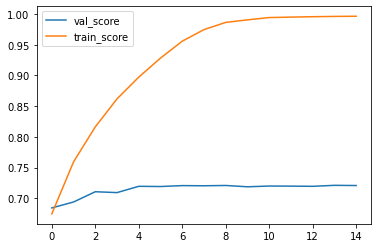

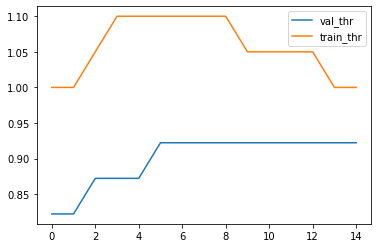

In [11]:
plot_hist(thr_score_hist)

In [12]:
torch.save(thr_score_hist, 'data/image_models/deit/perf.pth')

## Full train

In [1]:
from imports import *
from utils import load_data
from image_train.data import create_dl, ImageDS
from image_train.model import EMBRes
from arcface import ArcMarginProduct, compute_centers
from image_train.train import *
import matplotlib.pyplot as plt
np.random.seed(1337)
device = torch.device('cuda')

In [2]:
df, train_df, val_df, train_labels, val_labels = load_data(train_perc=1)

In [3]:
# creating dataloaders
small_images_dir_train = 'data/small_train_images_540/'
small_images_dir_val = 'data/small_train_images_512/'
bs = 8

tr_dl = create_dl(train_df, small_images_dir_train, batch_size=bs)
tr_test_dl = create_dl(train_df, small_images_dir_val, shuffle=False, batch_size=bs)
val_dl = create_dl(val_df, small_images_dir_val, shuffle=False, batch_size=bs)
#full_dl = create_dl(df, small_images_dir, shuffle=False)

In [4]:
vision_model = 'efficientnet_b3a'
model = timm.create_model(vision_model, pretrained=True, num_classes=0).to('cuda')
train_tfms, val_tfms = get_tfms(crop=512)

In [5]:
#centers = compute_centers(tr_test_dl, model, val_tfms, train_df)
#torch.save(centers, 'data/image_models/deit/centers.pth')

In [6]:
centers = torch.load('data/image_models/deit/centers.pth')

In [7]:
metric_fc = ArcMarginProduct(1536, train_df['label_group'].nunique(), 
                             s=30, m=0.5, easy_margin=False, centers=centers).to(device)

Using center as wieghts


In [8]:
n_epochs, lf, params, optimizer, sched = get_hparams(tr_dl, model, metric_fc, lr=5e-4, n_epochs=8)

In [9]:
loss_hist = []
best_thr_score={'train': {'thr': None, 'f1': None}}
thr_score_hist=[]
ep_start = 0
save_path = 'data/image_models/deit/full_train_5ap'

In [11]:
best_thr_score, thr_score_hist, losses = train_full_data(model, optimizer, lf, sched, metric_fc, tr_dl,
                                               n_epochs, train_df, train_tfms, val_tfms, 
                                               save_path=save_path, 
                                               prev_best_info=best_thr_score, info_history=thr_score_hist,
                                               ep_start=ep_start, test_score=False)
loss_hist.append(losses)
ep_start += n_epochs

Checkpoint : saved model to data/image_models/deit/full_train_5ap_ep_0.pth
Ep 0: Loss 10.3409


Ep 1: Loss 8.8363


Checkpoint : saved model to data/image_models/deit/full_train_5ap_ep_2.pth
Ep 2: Loss 7.6811


Ep 3: Loss 5.6952


Checkpoint : saved model to data/image_models/deit/full_train_5ap_ep_4.pth
Ep 4: Loss 3.8719


Ep 5: Loss 2.3637


Checkpoint : saved model to data/image_models/deit/full_train_5ap_ep_6.pth
Ep 6: Loss 1.3630


Ep 7: Loss 0.9135


In [12]:
torch.save(model.state_dict(), 'data/image_models/deit/effnetb3_8ep-pth')

In [6]:
model.load_state_dict(torch.load('data/image_models/deit/effnetb3_8ep-pth'))

<All keys matched successfully>

In [7]:
model.eval()
with torch.no_grad():
    pbar = tqdm(tr_test_dl, leave=False)
    embs = []
    for imgs, _ in pbar:
        imgs = val_tfms(imgs).to('cuda')
        feature = model(imgs)
        embs.append(feature)
    embs = F.normalize(torch.cat(embs, 0))

TypeError: unsupported operand type(s) for /: 'JpegImageFile' and 'float'

In [15]:
torch.save(embs, 'data/image_models/final_embs.pth')

In [6]:
embs = torch.load('data/image_models/final_embs.pth')

In [7]:
embs.shape

torch.Size([34250, 1536])

In [8]:
embs

tensor([[ 0.0357, -0.0178, -0.0262,  ..., -0.0009,  0.0108, -0.0179],
        [ 0.0407, -0.0216, -0.0152,  ..., -0.0110,  0.0138,  0.0253],
        [ 0.0298, -0.0153, -0.0056,  ..., -0.0402, -0.0195,  0.0146],
        ...,
        [ 0.0182, -0.0195,  0.0596,  ..., -0.0106, -0.0093,  0.0049],
        [-0.0205, -0.0324, -0.0061,  ..., -0.0177, -0.0413, -0.0261],
        [-0.0180,  0.0007, -0.0043,  ..., -0.0103, -0.0121,  0.0081]],
       device='cuda:0')

In [22]:
scores = compute_f1(embs, df['label_group'], np.linspace(0.7, 1, 10))

In [23]:
scores

({0.7: 0.8023401534438119,
  0.7333333333333333: 0.8219227128624793,
  0.7666666666666666: 0.8407645621401514,
  0.7999999999999999: 0.8584723101434115,
  0.8333333333333333: 0.8748157028239406,
  0.8666666666666667: 0.891319351498072,
  0.9: 0.9049163421233379,
  0.9333333333333333: 0.9162830924395339,
  0.9666666666666667: 0.9270530036546026,
  1.0: 0.9350000503918606},
 1.0,
 0.9350000503918606)

## DeiT

### 30/70 without weight init

### 30/70 split

In [1]:
from imports import *
from utils import load_data
from image_train.data import create_dl, ImageDS
from image_train.model import EMBRes
from arcface import ArcMarginProduct, compute_centers
from image_train.train import *
import matplotlib.pyplot as plt
np.random.seed(1337)
device = torch.device('cuda')

In [3]:
df, train_df, val_df, train_labels, val_labels = load_data(df_path='data/train_image_text_cleaned.csv', train_perc=0.3)

In [3]:
# creating dataloaders
small_images_dir_train = 'data/small_train_images_540/'
small_images_dir_val = 'data/small_train_images_512/'
bs = 8

tr_dl = create_dl(train_df, small_images_dir_train, batch_size=bs)
tr_test_dl = create_dl(train_df, small_images_dir_val, shuffle=False, batch_size=bs)
val_dl = create_dl(val_df, small_images_dir_val, shuffle=False, batch_size=bs)
#full_dl = create_dl(df, small_images_dir, shuffle=False)

In [4]:
vision_model = 'efficientnet_b3a'
model = timm.create_model(vision_model, pretrained=True, num_classes=0).to('cuda')
train_tfms, val_tfms = get_tfms(crop=512)

In [5]:
centers = compute_centers(tr_test_dl, model, val_tfms, train_df)
torch.save(centers, 'data/image_models/deit_clean_data/centers_0.3.pth')

In [6]:
centers = torch.load('data/image_models/deit_clean_data/centers_0.3.pth')

In [7]:
metric_fc = ArcMarginProduct(1536, train_df['label_group'].nunique(), 
                             s=30, m=0.5, easy_margin=False, centers=centers).to(device)

Using center as wieghts


In [8]:
n_epochs, lf, params, optimizer, sched = get_hparams(tr_dl, model, metric_fc, lr=5e-4, n_epochs=15)

In [9]:
loss_hist = []
best_thr_score={'val': {'thr': None, 'f1': None}, 'train': {'thr': None, 'f1': None}}
thr_score_hist=[]
ep_start = 0
save_path = 'data/image_models/deit_clean_data/test_5ap'

In [10]:
best_thr_score, thr_score_hist, losses = train(model, optimizer, lf, sched, metric_fc, tr_dl, val_dl,
                                               n_epochs, train_df, val_df, train_tfms, val_tfms, 
                                               save_path=save_path, 
                                               prev_best_info=best_thr_score, info_history=thr_score_hist,
                                               ep_start=ep_start)
loss_hist.append(losses)
ep_start += n_epochs

TypeError: unsupported operand type(s) for /: 'JpegImageFile' and 'float'

In [13]:
torch.save(metric_fc, 'data/image_models/arcmarg_14ep_0.3.pth')

In [10]:
def plot_hist(history) : 
    train_scores = [info['train']['f1'] for info in history]
    train_thr = [info['train']['thr'] for info in history]
    val_scores = [info['val']['f1'] for info in history]
    val_thr = [info['val']['thr'] for info in history]
    x = range(len(train_scores))
    plt.plot(x, val_scores, label='val_score')
    plt.plot(x, train_scores, label='train_score')
    plt.legend()
    plt.show()
    plt.plot(x, val_thr, label='val_thr')
    plt.plot(x, train_thr, label='train_thr')
    plt.legend()
    plt.show()

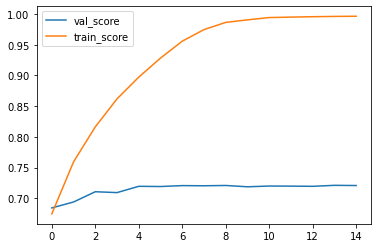

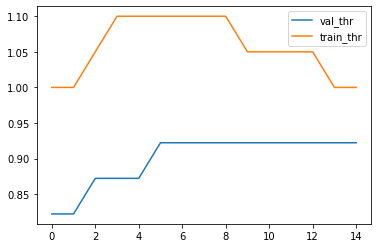

In [11]:
plot_hist(thr_score_hist)

In [12]:
torch.save(thr_score_hist, 'data/image_models/deit/perf.pth')

## Full train

In [1]:
from imports import *
from utils import load_data
from image_train.data import create_dl, ImageDS
from image_train.model import EMBRes
from arcface import ArcMarginProduct, compute_centers
from image_train.train import *
import matplotlib.pyplot as plt
np.random.seed(1337)
device = torch.device('cuda')

In [2]:
df, train_df, val_df, train_labels, val_labels = load_data(df_path='data/train_image_text_cleaned.csv', train_perc=1)

In [3]:
# creating dataloaders
small_images_dir_train = 'data/small_train_images_540/'
small_images_dir_val = 'data/small_train_images_512/'
bs = 8

tr_dl = create_dl(train_df, small_images_dir_train, batch_size=bs)
tr_test_dl = create_dl(train_df, small_images_dir_val, shuffle=False, batch_size=bs)
val_dl = create_dl(val_df, small_images_dir_val, shuffle=False, batch_size=bs)
#full_dl = create_dl(df, small_images_dir, shuffle=False)

In [4]:
vision_model = 'efficientnet_b3a'
model = timm.create_model(vision_model, pretrained=True, num_classes=0).to('cuda')
train_tfms, val_tfms = get_tfms(crop=512)

centers = compute_centers(tr_test_dl, model, val_tfms, train_df)
torch.save(centers, 'data/image_models/deit/centers.pth')

In [5]:
centers = torch.load('data/image_models/deit/centers.pth')

In [6]:
metric_fc = ArcMarginProduct(1536, train_df['label_group'].nunique(), 
                             s=30, m=0.5, easy_margin=False, centers=centers).to(device)

Using center as wieghts


In [7]:
n_epochs, lf, params, optimizer, sched = get_hparams(tr_dl, model, metric_fc, lr=5e-4, n_epochs=8)

In [8]:
loss_hist = []
best_thr_score={'train': {'thr': None, 'f1': None}}
thr_score_hist=[]
ep_start = 0
save_path = 'data/image_models/deit_clean_data/full_train_19ap'

In [9]:
best_thr_score, thr_score_hist, losses = train_full_data(model, optimizer, lf, sched, metric_fc, tr_dl,
                                               n_epochs, train_df, train_tfms, val_tfms, 
                                               save_path=save_path, 
                                               prev_best_info=best_thr_score, info_history=thr_score_hist,
                                               ep_start=ep_start, test_score=False)
loss_hist.append(losses)
ep_start += n_epochs

Checkpoint : saved model to data/image_models/deit_clean_data/full_train_19ap_ep_0.pth
Ep 0: Loss 10.2578


Ep 1: Loss 8.6256


Checkpoint : saved model to data/image_models/deit_clean_data/full_train_19ap_ep_2.pth
Ep 2: Loss 7.4118


Ep 3: Loss 5.4157


Checkpoint : saved model to data/image_models/deit_clean_data/full_train_19ap_ep_4.pth
Ep 4: Loss 3.5937


Ep 5: Loss 2.1037


Checkpoint : saved model to data/image_models/deit_clean_data/full_train_19ap_ep_6.pth
Ep 6: Loss 1.1377


Ep 7: Loss 0.7152


In [13]:
torch.save(model.state_dict(), 'data/image_models/deit_clean_data/effnetb3_8ep-pth')

In [14]:
model.load_state_dict(torch.load('data/image_models/deit_clean_data/effnetb3_8ep-pth'))

<All keys matched successfully>

In [15]:
model.eval()
with torch.no_grad():
    pbar = tqdm(tr_test_dl, leave=False)
    embs = []
    for imgs, _ in pbar:
        imgs = val_tfms(imgs).to('cuda')
        feature = model(imgs)
        embs.append(feature)
    embs = F.normalize(torch.cat(embs, 0))

In [16]:
torch.save(embs, 'data/image_models/final_embs_clean.pth')

In [17]:
embs = torch.load('data/image_models/final_embs_clean.pth')

In [18]:
embs.shape

torch.Size([34250, 1536])

In [19]:
embs

tensor([[ 0.0206, -0.0176, -0.0335,  ..., -0.0077, -0.0130, -0.0240],
        [ 0.0317, -0.0287, -0.0023,  ..., -0.0063,  0.0009,  0.0395],
        [ 0.0256, -0.0175, -0.0019,  ..., -0.0246, -0.0162,  0.0272],
        ...,
        [ 0.0374,  0.0005,  0.0475,  ..., -0.0176, -0.0233, -0.0090],
        [-0.0056, -0.0316,  0.0198,  ..., -0.0206, -0.0155, -0.0202],
        [-0.0076,  0.0023,  0.0213,  ..., -0.0001, -0.0066,  0.0153]],
       device='cuda:0')

In [22]:
scores = compute_f1(embs, df['label_group'], np.linspace(0.7, 1, 10))

In [23]:
scores

({0.7: 0.8023401534438119,
  0.7333333333333333: 0.8219227128624793,
  0.7666666666666666: 0.8407645621401514,
  0.7999999999999999: 0.8584723101434115,
  0.8333333333333333: 0.8748157028239406,
  0.8666666666666667: 0.891319351498072,
  0.9: 0.9049163421233379,
  0.9333333333333333: 0.9162830924395339,
  0.9666666666666667: 0.9270530036546026,
  1.0: 0.9350000503918606},
 1.0,
 0.9350000503918606)